In [244]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data_spectrum = pickle.load(open('../data/train/spectrum.pkl', 'rb'))
test_data_spectrum = pickle.load(open('../data/test/spectrum.pkl', 'rb'))

In [245]:
# print(train_data_spectrum.keys())
# print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'].keys())
# print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994].keys())
# # print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr'])

# # Data layout
# # mzml file: {scan number: {mz_arr: [], intensity_arr: [] }}

In [246]:
# Collect array lengths
# Same for mz and intensity arrs
mz_lens = []
for scan_num in train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML']:
    mz_lens.append(len(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']))

In [247]:
# print(mz_lens)

<Axes: ylabel='Count'>

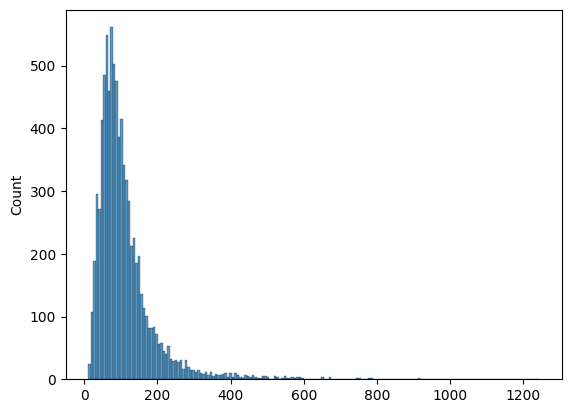

In [248]:
# Distribution of mz_lens
sns.histplot(mz_lens)

In [249]:
# For mz_lens, print num of lens from 100 to 200, 200 to 300, etc
for i in range(0, 3000, 100):
    print('mz_lens from {} to {}: {}'.format(i, i+100, len([x for x in mz_lens if x >= i and x < i+100])))

mz_lens from 0 to 100: 4780
mz_lens from 100 to 200: 2777
mz_lens from 200 to 300: 500
mz_lens from 300 to 400: 136
mz_lens from 400 to 500: 72
mz_lens from 500 to 600: 41
mz_lens from 600 to 700: 14
mz_lens from 700 to 800: 14
mz_lens from 800 to 900: 3
mz_lens from 900 to 1000: 5
mz_lens from 1000 to 1100: 4
mz_lens from 1100 to 1200: 0
mz_lens from 1200 to 1300: 1
mz_lens from 1300 to 1400: 0
mz_lens from 1400 to 1500: 0
mz_lens from 1500 to 1600: 0
mz_lens from 1600 to 1700: 0
mz_lens from 1700 to 1800: 0
mz_lens from 1800 to 1900: 0
mz_lens from 1900 to 2000: 0
mz_lens from 2000 to 2100: 0
mz_lens from 2100 to 2200: 0
mz_lens from 2200 to 2300: 0
mz_lens from 2300 to 2400: 0
mz_lens from 2400 to 2500: 0
mz_lens from 2500 to 2600: 0
mz_lens from 2600 to 2700: 0
mz_lens from 2700 to 2800: 0
mz_lens from 2800 to 2900: 0
mz_lens from 2900 to 3000: 0


In [250]:
mz_maxes = []
intensity_maxes = []
for scan_num in train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML']:
    mz_maxes.append(max(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']))
    intensity_maxes.append(max(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['intensity_arr']))

In [251]:
# print(mz_maxes)
# print(intensity_maxes)

Text(0.5, 0, 'Max Intensity')

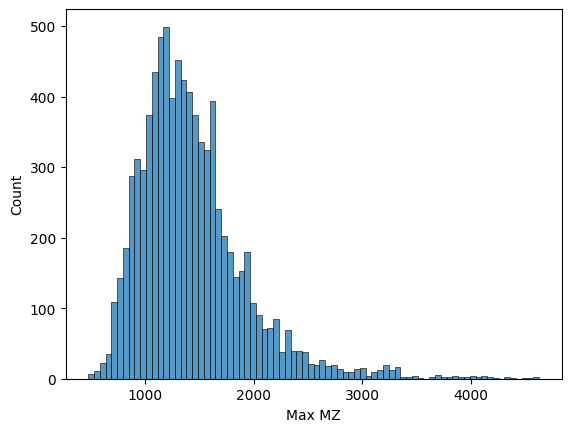

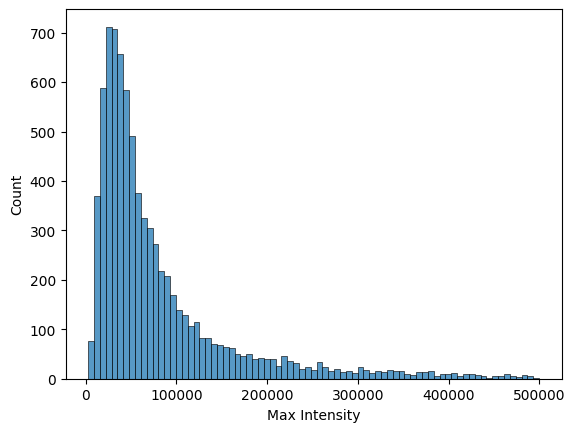

In [252]:
# Plot mz_maxes distribution
sns.histplot(mz_maxes)
plt.xlabel('Max MZ')
plt.figure()

# Remove outliers for this one
intensity_maxes_filtered = [x for x in intensity_maxes if x < 500000]
sns.histplot(intensity_maxes_filtered)
plt.xlabel('Max Intensity')

In [253]:
# For mz_maxes, print count and percent of total where less than 100, less than 200, etc
for i in range(0, 5000, 100):
    print('mz_maxes less than {}: {} ({}%)'.format(i, len([x for x in mz_maxes if x < i]), round(len([x for x in mz_maxes if x < i])/len(mz_maxes)*100, 3)))

# For intensity_maxes, print count and percent of total where less than 100, less than 200, etc up until max value
# Too big to print all, just see plot below
# for i in range(0, 500000, 1000):
#     print('intensity_maxes less than {}: {} ({}%)'.format(i, len([x for x in intensity_maxes if x < i]), round(len([x for x in intensity_maxes if x < i])/len(intensity_maxes)*100, 3)))
# print(max(intensity_maxes))


mz_maxes less than 0: 0 (0.0%)
mz_maxes less than 100: 0 (0.0%)
mz_maxes less than 200: 0 (0.0%)
mz_maxes less than 300: 0 (0.0%)
mz_maxes less than 400: 0 (0.0%)
mz_maxes less than 500: 3 (0.036%)
mz_maxes less than 600: 23 (0.276%)
mz_maxes less than 700: 82 (0.982%)
mz_maxes less than 800: 336 (4.025%)
mz_maxes less than 900: 791 (9.476%)
mz_maxes less than 1000: 1349 (16.161%)
mz_maxes less than 1100: 2091 (25.051%)
mz_maxes less than 1200: 3006 (36.013%)
mz_maxes less than 1300: 3815 (45.705%)
mz_maxes less than 1400: 4608 (55.205%)
mz_maxes less than 1500: 5316 (63.688%)
mz_maxes less than 1600: 5979 (71.631%)
mz_maxes less than 1700: 6543 (78.387%)
mz_maxes less than 1800: 6897 (82.628%)
mz_maxes less than 1900: 7176 (85.971%)
mz_maxes less than 2000: 7460 (89.373%)
mz_maxes less than 2100: 7645 (91.59%)
mz_maxes less than 2200: 7765 (93.027%)
mz_maxes less than 2300: 7880 (94.405%)
mz_maxes less than 2400: 7976 (95.555%)
mz_maxes less than 2500: 8051 (96.454%)
mz_maxes less tha

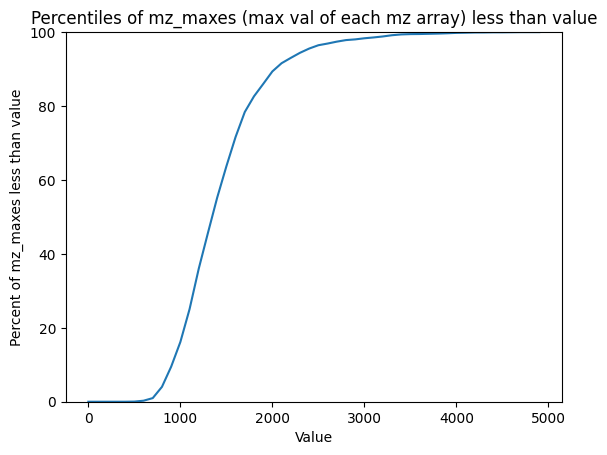

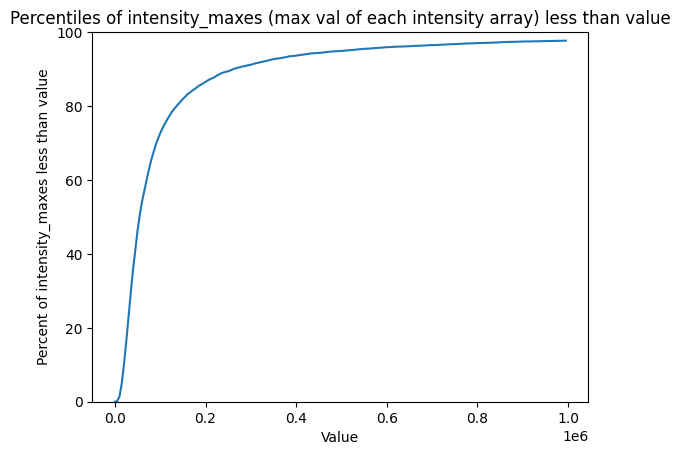

In [254]:
# line plot representing the percentiles of mz_maxes less than values
x = [x for x in range(0, 5000, 100)]
y = [round(len([x for x in mz_maxes if x < i])/len(mz_maxes)*100, 3) for i in range(0, 5000, 100)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of mz_maxes less than value')
plt.xlabel('Value')
plt.title('Percentiles of mz_maxes (max val of each mz array) less than value')
plt.show()

# line plot representing the percentiles of intensity_maxes less than values
x = [x for x in range(0, 1000000, 5000)]
y = [round(len([x for x in intensity_maxes if x < i])/len(intensity_maxes)*100, 3) for i in range(0, 1000000, 5000)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of intensity_maxes less than value')
plt.xlabel('Value')
plt.title('Percentiles of intensity_maxes (max val of each intensity array) less than value')
plt.show()